In [16]:
import pandas as pd 
import matplotlib.pyplot as plt  
import scipy.stats as st 
import numpy as np 
import datetime as dt 

In [17]:
# increase max number of columns and rows visible and read in master data file
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 45)
price_df = pd.read_csv('../all_listings_df')
price_df.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,NaN,1 bath,2.0,2.0,90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,2.87,Denver
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,1,1,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,1,0.50,Denver
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,NaN,1 shared bath,NaN,1.0,64.0,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,4.04,Denver
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,NaN,1 shared bath,NaN,1.0,57.0,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,0.95,Denver
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,NaN,1 private bath,NaN,2.0,33.0,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,1.39,Denver


In [18]:
# row count
# price_df

In [19]:
# check for null values in 'price'
null_counts_price = price_df['price'].isna().sum()
print(null_counts_price)

0


In [20]:
# Create property type dataframe

prop_df = pd.DataFrame(price_df[["id", "price", "property_type", "city"]])

prop_df = prop_df.set_index("id")
prop_df

,price,property_type,city
id,,,
360,90.0,Entire guesthouse,Denver
364,179.0,Entire loft,Denver
590,64.0,Private room in home,Denver
592,57.0,Private room in home,Denver
686,33.0,Private room in home,Denver
...,...,...,...
979474665987354279,258.0,Entire home,Portland
980422903985425172,99.0,Entire rental unit,Portland
980439098128842446,165.0,Entire home,Portland


In [21]:
# Use Pandas to calculate the quartiles, IQR, and median
quartiles = prop_df['price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

The lower quartile of price is: 99.0
The upper quartile of price is: 249.0
The interquartile range of price is: 150.0
The the median of price is: 154.0 


In [22]:
# check max and min price value
max_value = prop_df['price'].max()
min_value = prop_df['price'].min()
print(max_value)
print(min_value)

99713.0
17.0


In [23]:
# use the IQR to determine upper/lower bound for outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below -126.0 could be outliers.
Values above 474.0 could be outliers.


In [ ]:
# look at over 474 prices

# over_474_df = prop_df.loc[prop_df['price'] >= 474]
# over_474_df.to_csv('over_474.csv')
# over_474_df


In [24]:
# filter to remove outliers

filtered_prop_df = prop_df.loc[prop_df['price'] < 474]
filtered_prop_df


,price,property_type,city
id,,,
360,90.0,Entire guesthouse,Denver
364,179.0,Entire loft,Denver
590,64.0,Private room in home,Denver
592,57.0,Private room in home,Denver
686,33.0,Private room in home,Denver
...,...,...,...
979474665987354279,258.0,Entire home,Portland
980422903985425172,99.0,Entire rental unit,Portland
980439098128842446,165.0,Entire home,Portland


In [25]:
# group by property type
# something weird happened here

grouped_prop = filtered_prop_df.groupby('property_type')
grouped_prop.head()


,price,property_type,city
id,,,
360,90.0,Entire guesthouse,Denver
364,179.0,Entire loft,Denver
590,64.0,Private room in home,Denver
592,57.0,Private room in home,Denver
686,33.0,Private room in home,Denver
...,...,...,...
916072760302075056,101.0,Yurt,Portland
927743634178490569,225.0,Tower,Portland
930480412537827205,162.0,Private room in treehouse,Portland


In [26]:
prop_type_counts = grouped_prop['property_type'].count()

prop_type_counts_df = prop_type_counts.to_frame('count')

prop_type_counts_df = prop_type_counts_df.sort_values(by='count',ascending=False)
prop_type_counts_df['count'] = prop_type_counts_df['count'].astype(int)
prop_type_counts_df = prop_type_counts_df.reset_index()
prop_type_counts_df

,property_type,count
0,Entire home,5490
1,Entire rental unit,5133
2,Entire condo,2208
3,Private room in home,1630
4,Entire guest suite,1393
...,...,...
66,Earthen home,1
67,Shared room in vacation home,1
68,Shipping container,1
69,Dome,1


In [27]:
# calculate percentage of total property types. There are over 70 property types, but only about 8 make up 95% of them
# calculating percent to be able to narrow down to the most common property types

total_count = prop_type_counts_df['count'].sum()

prop_type_counts_df['percent of total'] = ((prop_type_counts_df['count'] / total_count) * 100).round(2)
prop_type_counts_df

,property_type,count,percent of total
0,Entire home,5490,25.82
1,Entire rental unit,5133,24.14
2,Entire condo,2208,10.39
3,Private room in home,1630,7.67
4,Entire guest suite,1393,6.55
...,...,...,...
66,Earthen home,1,0.00
67,Shared room in vacation home,1,0.00
68,Shipping container,1,0.00
69,Dome,1,0.00


In [28]:
#prop_type_counts_df.to_csv("prop types.csv", index=False)

In [29]:
prop_type_counts_filt_df = prop_type_counts_df.loc[prop_type_counts_df['percent of total'] > 5]
prop_type_counts_filt_df

,property_type,count,percent of total
0,Entire home,5490,25.82
1,Entire rental unit,5133,24.14
2,Entire condo,2208,10.39
3,Private room in home,1630,7.67
4,Entire guest suite,1393,6.55
5,Entire townhouse,1352,6.36


In [30]:
# filter the initial filtered_prop_df to only include top property types determined above:
columns_to_use = ["Entire home", "Entire rental unit", "Entire condo", "Private room in home", "Entire guest suite", "Entire townhouse"]

top_prop_type = filtered_prop_df[filtered_prop_df['property_type'].isin(columns_to_use)]
top_prop_type

,price,property_type,city
id,,,
590,64.0,Private room in home,Denver
592,57.0,Private room in home,Denver
686,33.0,Private room in home,Denver
21745,35.0,Private room in home,Denver
31503,103.0,Entire guest suite,Denver
...,...,...,...
979474665987354279,258.0,Entire home,Portland
980422903985425172,99.0,Entire rental unit,Portland
980439098128842446,165.0,Entire home,Portland


In [36]:
# get count of property types by city and average price by property type and by city

top_prop_group = top_prop_type.groupby(['city', 'property_type']).mean().round(2)
top_prop_group

price
city      property_type               
Boston    Entire condo          214.47
          Entire guest suite    146.76
          Entire home           251.61
          Entire rental unit    219.58
          Entire townhouse      290.61
          Private room in home   91.12
Denver    Entire condo          139.93
          Entire guest suite    117.14
          Entire home           202.26
          Entire rental unit    136.66
          Entire townhouse      206.21
          Private room in home   75.06
Nashville Entire condo          199.18
          Entire guest suite    120.36
          Entire home           231.49
          Entire rental unit    184.76
          Entire townhouse      234.37
          Private room in home   78.31
Portland  Entire condo          124.27
          Entire guest suite     98.02
          Entire home           169.69
          Entire rental unit    115.31
          Entire townhouse      172.40
          Private room in home   66.92

In [41]:
# pivot data to be able to create bar chart
# must also reset index to be able to pivot after having done groupby
top_prop_group = top_prop_group.reset_index()
pivoted_prop_type = top_prop_group.pivot(index='city', columns='property_type', values='price')
pivoted_prop_type

property_type,Entire condo,Entire guest suite,Entire home,Entire rental unit,Entire townhouse,Private room in home
city,,,,,,
Boston,214.47,146.76,251.61,219.58,290.61,91.12
Denver,139.93,117.14,202.26,136.66,206.21,75.06
Nashville,199.18,120.36,231.49,184.76,234.37,78.31
Portland,124.27,98.02,169.69,115.31,172.40,66.92


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Boston'),
  Text(1, 0, 'Denver'),
  Text(2, 0, 'Nashville'),
  Text(3, 0, 'Portland')])

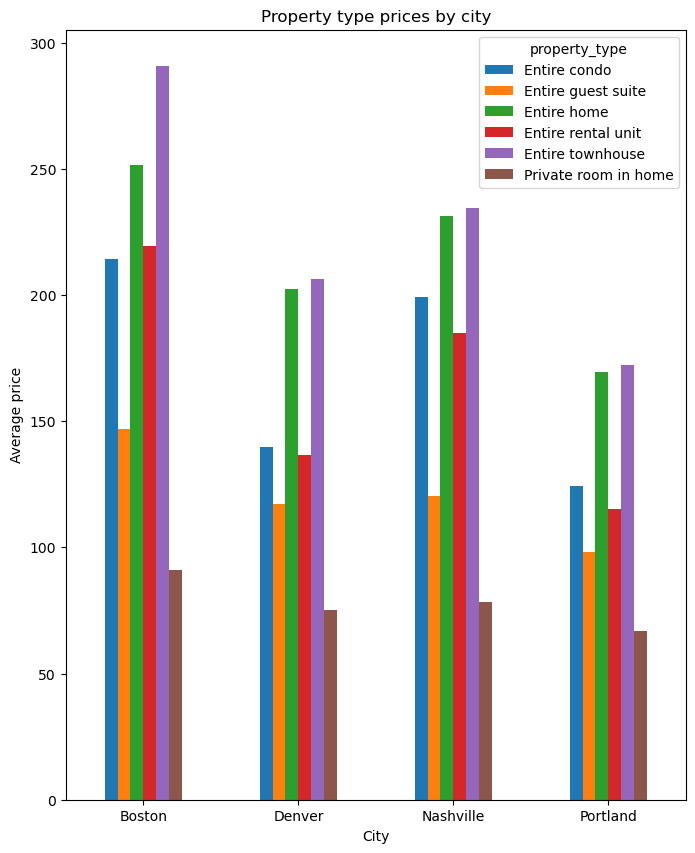

In [53]:
# prepare a bar graph of average price of top property types by city
# this graph has removed the price outliers, and only looking at property types that comprise >5% of total properties

pivoted_prop_type.plot(kind='bar', figsize=(8,10))
plt.title("Property type prices by city")
plt.ylabel("Average price")
plt.xlabel("City")
plt.xticks(rotation=0)

In [54]:
# tried to look at correlation, but it just looks at property type, doesn't include price
# prop_type_corr = pivoted_prop_type.corr()
# prop_type_corr.unstack().sort_values()

property_type         property_type       
Entire condo          Entire guest suite      0.865134
Entire guest suite    Entire condo            0.865134
Entire condo          Private room in home    0.892988
Private room in home  Entire condo            0.892988
Entire townhouse      Entire condo            0.932060
Entire condo          Entire townhouse        0.932060
Entire rental unit    Entire guest suite      0.934023
Entire guest suite    Entire rental unit      0.934023
                      Entire home             0.941231
Entire home           Entire guest suite      0.941231
                      Private room in home    0.950943
Private room in home  Entire home             0.950943
                      Entire rental unit      0.954931
Entire rental unit    Private room in home    0.954931
Entire home           Entire condo            0.967004
Entire condo          Entire home             0.967004
Entire townhouse      Entire home             0.967676
Entire home           

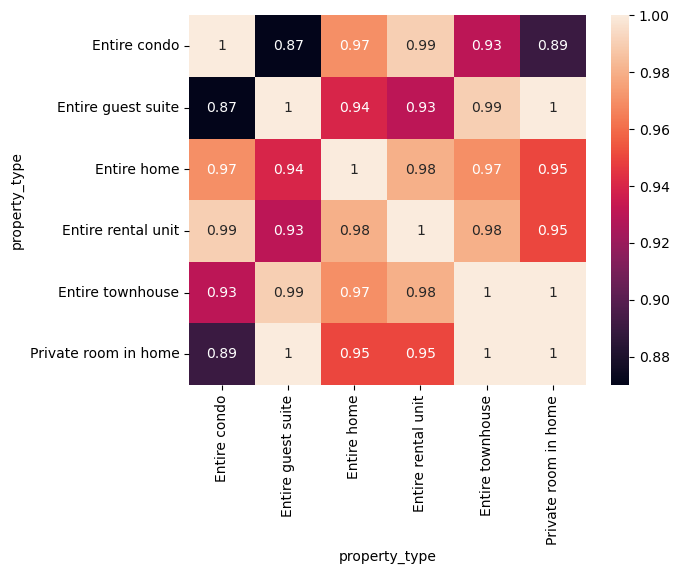

In [57]:
#property type heat map, does not include any city groupings

# import seaborn as sns

# matrix = pivoted_prop_type.corr().round(2)
# sns.heatmap(matrix, annot=True)
# plt.show()

In [31]:
# Group the top_prop_type dataframe by 'property_type'

grouped_top_prop = top_prop_type.groupby('property_type')

grouped_top_prop.head()

,price,property_type,city
id,,,
590,64.0,Private room in home,Denver
592,57.0,Private room in home,Denver
686,33.0,Private room in home,Denver
21745,35.0,Private room in home,Denver
31503,103.0,Entire guest suite,Denver
90307,90.0,Private room in home,Denver
154999,162.0,Entire condo,Denver
364585,165.0,Entire townhouse,Denver
504080,124.0,Entire home,Denver


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

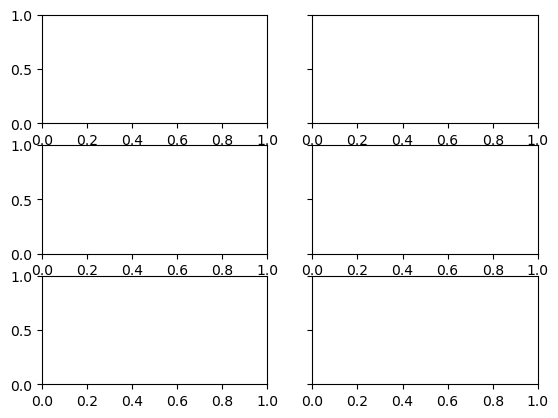

In [29]:
# create boxplot of property types

columns_to_plot = ['price', 'property_type']
grouped_top_prop.boxplot(column='property_type', by='price')


grouped_top_prop[columns_to_plot].plot(kind='box')
# plt.title('property type')
# plt.ylabel('price')
# plt.xlabel('property type')
plt.show()

# fig1, ax1 = plt.subplots()
# ax1.set_title('Property type')
# ax1.set_ylabel('Price')
# ax1.boxplot(prop_df)
# plt.show()

In [ ]:
# completeness check, count for cities should be: 
# Boston 4033
# Denver 5388
# Nashville 8584
# Portland 4846

grouped_df = price_df.groupby(['city'])

grouped_df['city'].value_counts()

In [ ]:
grouped_df['review_scores_rating'].value_counts()

In [ ]:
# Need to filter out any rows that don't have any reviews yet, as there will be no review rating. 
# Because have already groupedby, cannot use loc function. Have to either filter before groupedby,
# or use a custom function. Used custom function to avoid filtering before grouping

# def filter_groups(group):
#     return group[group['number_of_reviews'] > 0]

# filtered_grouped_df = grouped_df.apply(filter_groups)

# filtered_grouped_df.head()